In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## 1) Single Subject

**Check (and change) current working directory**

In [3]:
os.getcwd()
#os.listdir(os.getcwd())
os.chdir(r"C:\Users\Steffi\Desktop\Semester 2\Practical Skills for Researchers\Data\Pilot3\output_crowding")

**Read data**

In [4]:
data = pd.read_csv("data_crowding_pp_02.csv",sep='\t')
data = data.loc[144:719]

**Show data**

In [5]:
data

,Unnamed: 0,RT,flanker_presence,key_pressed,target_ecc,target_flank_ratio,target_orientation
144,0,0.799949,flankers,right,4.0,0.80,left
145,1,1.000105,flankers,left,8.0,0.80,left
146,2,0.783368,flankers,right,4.0,0.80,right
147,3,0.950074,flankers,left,4.0,0.80,left
148,4,0.866749,flankers,right,4.0,0.80,right
149,5,0.741727,no flankers,right,8.0,0.80,right
150,6,0.800054,flankers,left,12.0,0.80,left
151,7,0.841593,flankers,right,12.0,0.80,left
152,8,0.825119,flankers,right,4.0,0.80,right
153,9,0.866778,flankers,left,4.0,0.80,right


**Plot data**

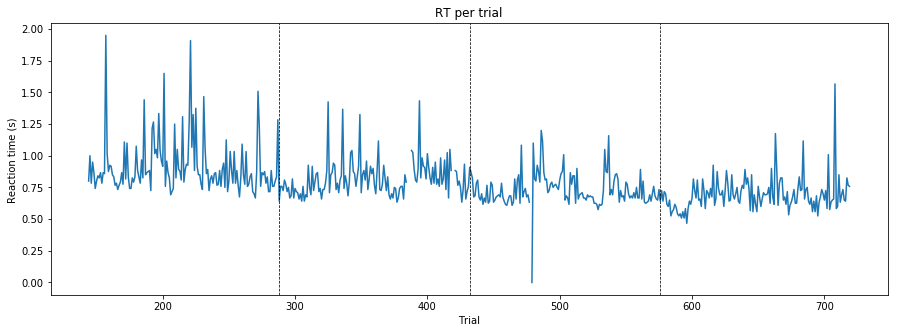

In [6]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["RT"])
plt.ylabel("Reaction time (s) ")
plt.xlabel("Trial")
plt.title("RT per trial")
xposition = [288,432,576]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

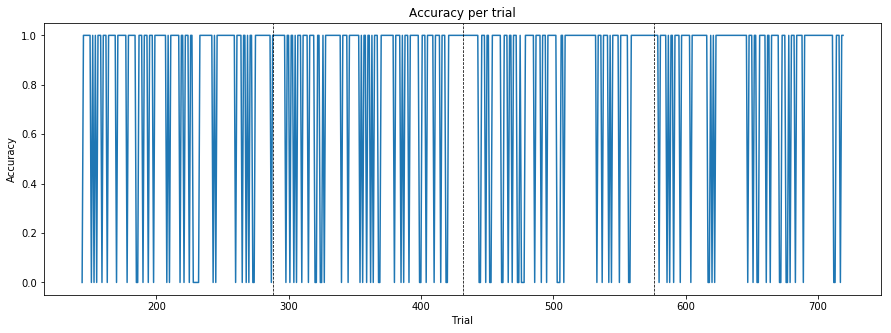

In [7]:
%matplotlib inline
accuracy = data['key_pressed']==data['target_orientation']
plt.figure(figsize=(15,5))
plt.plot(accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Trial")
plt.title("Accuracy per trial")
xposition = [288,432,576]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

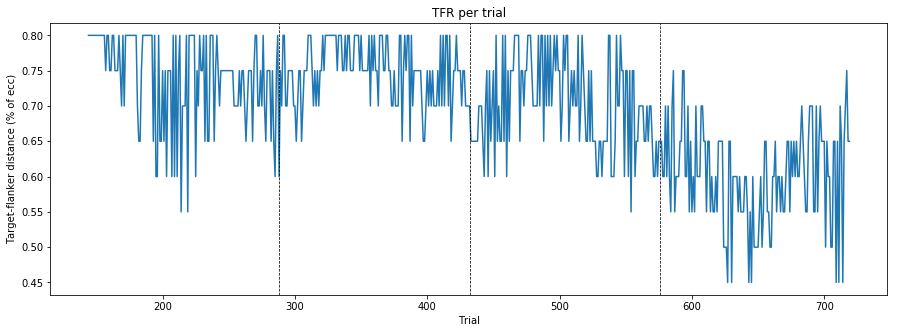

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["target_flank_ratio"])
plt.ylabel("Target-flanker distance (% of ecc)")
plt.xlabel("Trial")
plt.title("TFR per trial")
xposition = [288,432,576]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

### Data analysis

In [9]:
accuracy = data['key_pressed']==data['target_orientation']
mean_accuracy = float(sum(accuracy))/float(len(accuracy))
print("Mean accuracy across trials:", mean_accuracy)

Mean accuracy across trials: 0.796875


**Data per eccentricity**

In [10]:
ecc = [4,8,12]
trials_per_ecc = len(data)/len(ecc)
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(144,720):
        if data["target_ecc"][i]==e and data['key_pressed'][i]==data['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/trials_per_ecc)
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.8177083333333334, 0.7864583333333334, 0.7864583333333334]
[0.6907643312101915, 0.6953642384105962, 0.6877483443708605]


**Data per block**

In [11]:
blocks = 4
trials_per_block = len(data)/blocks
trials_per_block_per_ecc = trials_per_block/len(ecc)
block_separation=[144,288,432,576,719]

acc_ecc_block = np.zeros((blocks, len(ecc)))
ratio_ecc_block = np.zeros((blocks, len(ecc)))

for b in range(blocks):
    
    for e in range(len(ecc)):
        ecc_acc = []
        ecc_ratio = []

        for i in range(block_separation[b],block_separation[b+1]):
            if data["flanker_presence"][i]=="flankers" and data["target_ecc"][i]==ecc[e] and data['key_pressed'][i]==data['target_orientation'][i]:
                ecc_acc.append(True)
                ecc_ratio.append(data['target_flank_ratio'][i])
            else:
                ecc_acc.append(False)
        
        acc_ecc_block[b,e]=(float(sum(ecc_acc))/trials_per_block_per_ecc)
        ratio_ecc_block[b,e]=(sum(ecc_ratio)/len(ecc_ratio))
        
print(acc_ecc_block)
print(ratio_ecc_block)

[[0.72916667 0.60416667 0.5625    ]
 [0.6875     0.58333333 0.6875    ]
 [0.72916667 0.6875     0.52083333]
 [0.66666667 0.72916667 0.60416667]]
[[0.73571429 0.74137931 0.71481481]
 [0.75       0.74642857 0.73636364]
 [0.68285714 0.69848485 0.708     ]
 [0.5921875  0.59142857 0.60172414]]


Text(0.5, 1.0, 'Accuracy per eccentricity')

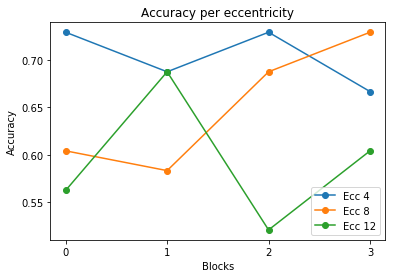

In [12]:
#Plot Accuracy
plt.figure
plt.plot(acc_ecc_block[:,0], marker='o')
plt.plot(acc_ecc_block[:,1], marker='o')
plt.plot(acc_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Accuracy")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Accuracy per eccentricity")

Text(0.5, 1.0, 'Target-Flanker-Ratio per eccentricity')

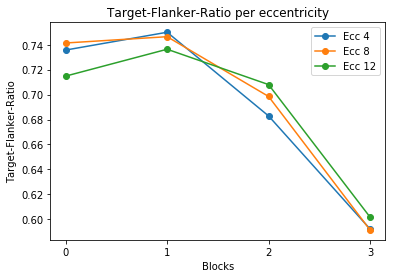

In [13]:
#Plot Target-flanker-ratio
plt.figure
plt.plot(ratio_ecc_block[:,0], marker='o')
plt.plot(ratio_ecc_block[:,1], marker='o')
plt.plot(ratio_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Target-Flanker-Ratio")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Target-Flanker-Ratio per eccentricity")

## 2) Group of Subjects

**Combine data of individual subjects**

In [14]:
#all_files = ["data_crowding_pp_01.csv","data_crowding_pp_02.csv","data_crowding_pp_03.csv","data_crowding_pp_ines.csv"]
all_files = ["data_crowding_pp_00.csv","data_crowding_pp_01.csv","data_crowding_pp_02.csv"]#,"data_crowding_pp_03.csv", "data_crowding_pp_04.csv"]

subs = []    
for filename in all_files:
    a = pd.read_csv(filename, sep='\t')
    a = a.loc[144:719]
    subs.append(a)
data_all = pd.concat(subs, ignore_index = True)

**Data per eccentricity**

In [15]:
ecc = [4,8,12]
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(len(data_all)):
        if data_all['flanker_presence'][i]=="flankers" and data_all["target_ecc"][i]==e and data_all['key_pressed'][i]==data_all['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data_all['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/(len(data_all)/len(ecc)))
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.6875, 0.671875, 0.6458333333333334]
[0.5787878787878791, 0.5855297157622741, 0.5752688172043009]


**Compare Reaction Times**

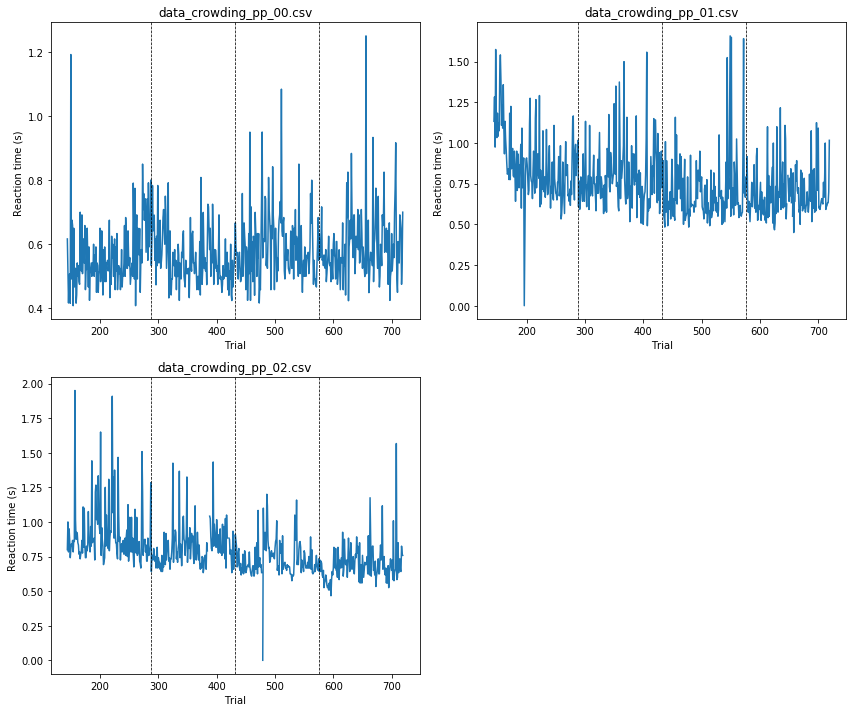

In [16]:
rows = (len(all_files)/2)+1
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    data_sub = data_sub.loc[144:719]
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [288,432,576]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare Target-Flanker-Ratio**

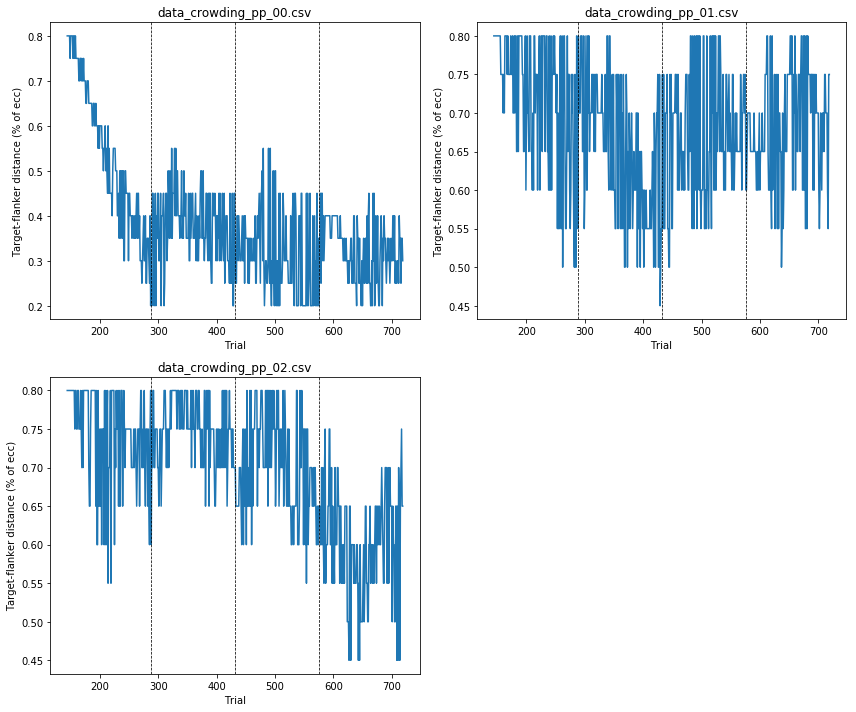

In [17]:
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    data_sub = data_sub.loc[144:719]
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["target_flank_ratio"])
    plt.ylabel("Target-flanker distance (% of ecc)")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [288,432,576]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare data per block**

In [18]:
blocks = 4
trials_per_block = len(data)/blocks
trials_per_block_per_ecc = trials_per_block/len(ecc)
block_separation=[144,288,432,576,719]

acc_ecc_block = np.zeros((blocks, len(ecc), len(all_files)))
ratio_ecc_block = np.zeros((blocks, len(ecc), len(all_files)))

for sub in range(len(all_files)):
    
    data_sub = pd.read_csv(all_files[sub], sep='\t')
    data_sub = data_sub.loc[144:719]
    
    for b in range(blocks):
        
        for e in range(len(ecc)):
            ecc_acc = []
            ecc_ratio = []
            
            for i in range(block_separation[b],block_separation[b+1]):
                if data_sub['flanker_presence'][i]=="flankers" and data_sub["target_ecc"][i]==ecc[e] and data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    ecc_acc.append(True)
                    ecc_ratio.append(data_sub['target_flank_ratio'][i])
                else:
                    ecc_acc.append(False)
            acc_ecc_block[b,e,sub]=(float(sum(ecc_acc))/trials_per_block_per_ecc)
            ratio_ecc_block[b,e,sub]=(sum(ecc_ratio)/len(ecc_ratio))

**Compare Accuracy per block**

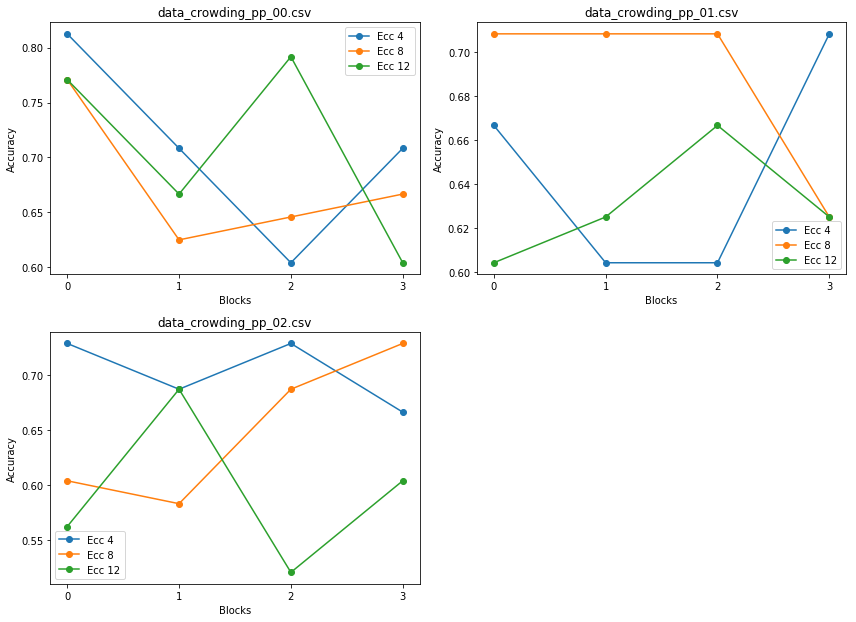

In [19]:
plt.figure(figsize=(12,rows*3.5))

for i in range(len(all_files)):
    plt.subplot(rows,2,i+1)
    plt.title(all_files[i])
    plt.plot(acc_ecc_block[:,0,i], marker='o')
    plt.plot(acc_ecc_block[:,1,i], marker='o')
    plt.plot(acc_ecc_block[:,2,i], marker='o')
    plt.xlabel("Blocks")
    plt.xticks(range(blocks))
    plt.ylabel("Accuracy")
    plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
    
plt.tight_layout()

**Compare Target-Flanker-Ratio per block**

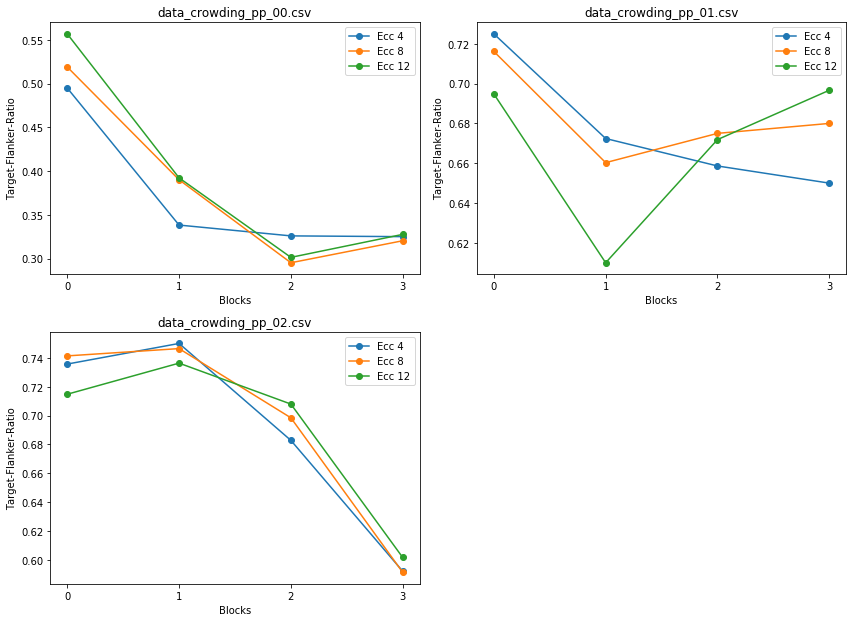

In [20]:
plt.figure(figsize=(12,rows*3.5))

for i in range(len(all_files)):
    plt.subplot(rows,2,i+1)
    plt.title(all_files[i])
    plt.plot(ratio_ecc_block[:,0,i], marker='o')
    plt.plot(ratio_ecc_block[:,1,i], marker='o')
    plt.plot(ratio_ecc_block[:,2,i], marker='o')
    plt.xlabel("Blocks")
    plt.xticks(range(blocks))
    plt.ylabel("Target-Flanker-Ratio")
    plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
    
plt.tight_layout()

**Accuracy Flankers vs. No Flankers**

In [23]:
trials_per_ecc = len(data)/len(ecc)
trials_per_ecc_flank = trials_per_ecc/1.2
trials_per_ecc_noflank = trials_per_ecc/6

acc_ecc_flank = np.zeros((len(ecc), len(all_files)))
acc_ecc_noflank = np.zeros((len(ecc), len(all_files)))

for sub in range(len(all_files)):
    
    data_sub = pd.read_csv(all_files[sub], sep='\t')
    data_sub = data_sub.loc[144:719]
    
    for e in range(len(ecc)):
        acc_flank = []
        trials_flank = []
        acc_noflank = []
        trials_noflank = []

        for i in range(144,720):
            
            if data_sub["flanker_presence"][i]=="flankers" and data_sub["target_ecc"][i]==ecc[e]:
                trials_flank.append(True)
                trials_noflank.append(False)
                
                if data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    acc_flank.append(True)
                else:
                    acc_flank.append(False)
            
            if data_sub['flanker_presence'][i]=="no flankers" and data_sub["target_ecc"][i]==ecc[e]:
                trials_noflank.append(True)
                trials_flank.append(False
                                   )
                if data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    acc_noflank.append(True)
                else:
                    acc_noflank.append(False)
        print(sum(trials_flank), sum(trials_noflank))
        acc_ecc_flank[e,sub]=(sum(acc_flank)/sum(trials_flank))
        acc_ecc_noflank[e,sub]=(sum(acc_noflank)/sum(trials_noflank))
    
print("Accuracy with Flankers:",acc_ecc_flank)
print("Accuracy without Flankers:",acc_ecc_noflank)

161 31
157 35
162 30
162 30
163 29
155 37
168 24
162 30
150 42
Accuracy with Flankers: [[0.8447205  0.7654321  0.80952381]
 [0.82802548 0.80981595 0.77160494]
 [0.84567901 0.78064516 0.76      ]]
Accuracy without Flankers: [[0.87096774 0.9        0.875     ]
 [0.97142857 1.         0.86666667]
 [0.93333333 0.94594595 0.88095238]]
